In [2]:
from __future__ import print_function
from IPython.display import Audio
from scipy.misc import face
from scipy.io import wavfile
from scipy import signal
from os.path import getsize
import util
%pylab inline

Populating the interactive namespace from numpy and matplotlib


  This is an iPython notebook. iPython makes it easy to run small snippets in
  Python code to see what happens! Here are some useful commands to use:
   
  1. Click on a cell (will have a green outline around it) and press
      SHIFT+ENTER to run the code in the cell. Make sure you run the top cell
      first, because it contains important import statements!
      
  2. You can also run a cell, or all the cells, using the 'Cell' menu up top.
  
  3. Save your work with CTRL+S, or in the File menu.
  
  If you have any questions, just ask!

# Section 1 - Images

For the following section, create some pixel art in greyscale. That means
using numbers from 0-1, 0 being totally black and 1 being totally white.

Don't spend tooooo much time on this, but make sure your picture has some
different shades of grey. Press SHIFT+ENTER while hovering on this cell to
update your changes.

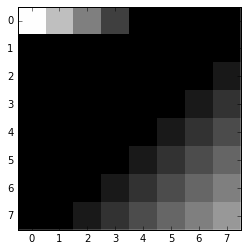

In [120]:
# Feel free to modify the numbers below to change the colors
my_image = np.array(
    [
        [1, 0.75, 0.5, 0.25, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3],
        [0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4],
        [0.0, 0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        [0.0, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    ],
    dtype=np.float
)
plt.imshow(my_image, cmap="gray", interpolation='none')
plt.figure()

Now that we have an image, we can make modifications to it by changing each pixel's value in a systematic way. We can brighten, darken, change the white balance, or overlay images on top of each other using some simple lines of code. Let's apply some transformations to your image! Try to guess what each code block is doing before you run it.

In [101]:
# this is the first transformation. Run the code block when you're ready.

my_image2 = np.array(my_image, copy=True)

for row_index, row in enumerate(my_image2):
    for pixel_index, pixel in enumerate(row):
        my_image2[row_index][pixel_index] = 1 if pixel > .5 else 0 # this is the important part!
                                                                   # what does it do?
    
print(".ot resolc saw ti eno hcihw no desab ,etihw ro kcalb rehtie ot lexip hcae strevnoc noitamrofsnart\
 siht rof edoc ehT"[::-1])

plt.imshow(my_image2, cmap="gray", interpolation='none')
plt.figure()

[[ 1.    1.    1.    0.75  0.5   0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5 ]
 [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5 ]]
This one is a lightening filter. It takes each number and adds a constant amount to it! Try changing the my_filter variable or even making it positive. What do you think will happen?


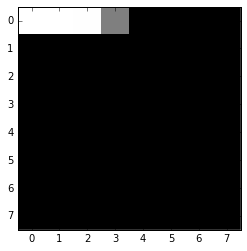

In [95]:
# how about this one?
# FIXME????

my_image3 = np.array(my_image, copy=True)

my_filter = .5

for row_index, row in enumerate(my_image3):
    for pixel_index, pixel in enumerate(row):
        #print(pixel, pixel+my_filter, min(max(pixel + my_filter, 0), 1))
        my_image3[row_index][pixel_index] = min(max(pixel + my_filter, 0), 1) #money line right here

print(my_image3)

print("?neppah lliw kniht uoy od tahW .evitisop ti gnikam neve ro elbairav retlif_ym eht gnignahc\
 yrT !ti ot tnuoma tnatsnoc a sdda dna rebmun hcae sekat tI .retlif gninethgil a si eno sihT"[::-1])

plt.imshow(my_image3, cmap="gray", interpolation='none')
plt.figure()

What if I wanted to make put a watermark or a YouTube annotation on the image? I have to overlay my image on top of your image. Let's say that my annotation, which is 9 pixels, looks like this:

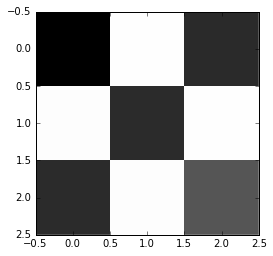

In [147]:
annotation = np.array([[0.4, 1.0, 0.5],
                       [1.0, 0.5, 1.0],
                       [0.5, 1.0, 0.6]],
                     dtype=float)
plt.imshow(annotation, cmap="gray", interpolation='none')

Overlaying the images takes a couple steps. First, I have to create an image that is totally blank except for my annotation, exactly where I want it. Then I will remove the parts of your image that take up the same space as my annoation (this is called an AND mask). Now there is no overlapping of images. For the final step, I will "add" the two images together (OR mask). The final result will have your image with my annotation in the corner!



Here is an image with all zeros except for my annotation:



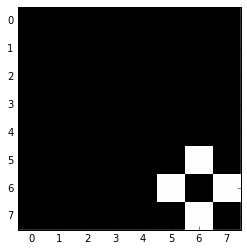

In [108]:
print("\n\nHere is an image with all zeros except for my annotation:\n")

annotation_in_corner = np.array(
    [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    ],
    dtype=np.float
)
plt.imshow(annotation_in_corner, cmap="gray", interpolation='none')


This bitmask will keep all of the pixels of your image except for the bottom 9 in the corner when I multiply it with your image. In effect, the pixel is nonzero if my pixel AND yours are nonzero.


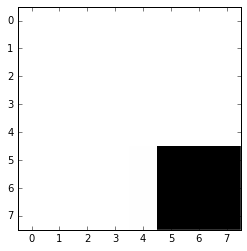

In [117]:
print("\nThis bitmask will keep all of the pixels of your image except for the bottom 9 in the corner\
 when I multiply it with your image. In effect, the pixel is nonzero if my pixel AND yours are nonzero.")

bitmask = np.array(
    [
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    ],
    dtype=np.float
)

plt.imshow(bitmask, cmap="gray", interpolation='none')


Now, let's multiply my bitmask and your image together! This is what the array looks like:

[[ 1.    0.75  0.5   0.25  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.1 ]
 [ 0.    0.    0.    0.    0.    0.    0.1   0.2 ]
 [ 0.    0.    0.    0.    0.    0.1   0.2   0.3 ]
 [ 0.    0.    0.    0.    0.1   0.    0.    0.  ]
 [ 0.    0.    0.    0.1   0.2   0.    0.    0.  ]
 [ 0.    0.    0.1   0.2   0.3   0.    0.    0.  ]]


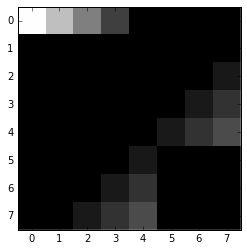

In [122]:
print("\nNow, let's multiply my bitmask and your image together! This is what the array looks like:\n")

my_image_masked = np.multiply(my_image, bitmask)
print(my_image_masked)
plt.imshow(my_image_masked, cmap="gray", interpolation='none')

In [ ]:
print("Finally, let's create the end image!")

Now let's work with a real image. This image has way more pixels than your pixel art, but the
structure is exactly the same! [note: not *exactly* the same, because the numbers are now from 0-255.] Let's apply some of the same "filters" that we applied to your pixel art. We'll start with a greyscale version.

In [35]:
raccoon_gray = face(True)
plt.imshow(raccoon_gray, cmap="gray", interpolation='none')

In [34]:
# Run this code to apply the black and white filter

for row_index, row in enumerate(raccoon_gray):
    for pixel_index, pixel in enumerate(row):
        raccoon_gray[row_index][pixel_index] = 255 if pixel > 128 else 0
        
plt.imshow(raccoon_gray, cmap="gray", interpolation='none')

In [89]:
# Run this code to apply the darkening and lightening filter.

raccoon_gray = face(True)

# add a darkening (negative) or lightening (positive) amount here!
# remember that the values range from 0-255 now.
my_filter = 


for row_index, row in enumerate(raccoon_gray):
    for pixel_index, pixel in enumerate(row):
        raccoon_gray[row_index][pixel_index] = min(max(pixel + my_filter, 0), 255)   

plt.imshow(raccoon_gray, cmap="gray", interpolation='none')

For our final step, let's work with color. Now, instead of there being one number for each pixel, there are three. These are the Red, Green, and Blue (RGB) values that you've probably heard of. We can manipulate these values in a similar way as with greyscale, but now we have even more creative control. Let's give our raccoon a nice Instagram filter.

In [31]:
# First, view the original picture in all its glory!

plt.imshow(face())
# Notice that each "item" of the data grid is now 3 values
# corresponding to Red, Green, and Blue values between 0 and 255
# The code below prints the top left corner, in a 3x3 region
print(face()[:3, :3, ...])

In [33]:
# Now, it's time to modify the color values. We will boost some colors by increasing their magnitude.

raccoon = face()

# play around with these values if you want!
red_boost = -10
green_boost = 45
blue_boost = 30
lighten = -20

# darken or lighten the image a little bit.
red_boost += lighten
green_boost += lighten
blue_boost += lighten

for row_index, row in enumerate(raccoon):
    for pixel_index, pixel in enumerate(row):
        # at this point, pixel is a length-3 array corresponding to the R, G, and B values of the pixel
        
        # change the color balance and make sure all values are between 0 and 255
        pixel[0] = min(max(pixel[0] + red_boost, 0), 255)
        pixel[1] = min(max(pixel[1] + green_boost, 0), 255)
        pixel[2] = min(max(pixel[2] + blue_boost, 0), 255)
            
plt.imshow(raccoon)

# Section 2 - Audio

Plays a simple A chord for 1 second

In [ ]:
frequencies = [440, 554.37, 659.25]
samplerate = 44100

samples = np.asarray([np.sin(np.linspace(0, 2 * np.pi * frequency, samplerate)) for frequency in frequencies])
Audio(np.concatenate(list(samples) + [np.sum(samples, axis=0)]), rate=samplerate)

In [ ]:
datarate = samplerate
data = np.sum(samples, axis=0)
# data = samples[1]

In [ ]:
plt.plot(range(len(data)), data, label="Intensity", alpha=0.3)
plt.title("Time Domain Intensities")
plt.legend()

To visualize the frequencies of the piece, we will convert 0.1s "chunks" of the song into the frequency domain.

In [ ]:
plt.imshow(20*np.log10(util.to_chunks(data, 1, datarate))[:1000], interpolation="none", aspect="auto", cmap='spectral')

Now we can create a "flat" sounding rendition of a song using frequencies

In [ ]:
# Re-run me after modifying lullaby
length = 256
sampling_rate = 44100*16

# Change this to change the number of beats per minute
beats_per_minute = 100

song = util.load_song("lullaby.txt") # change the file name to whatever you created
frequencies = util.song_to_frequencies(song)

# Replace the names with the part names you chose
song_parts = ["melody", "harmony", "left_hand_high", "left_hand_low"]
song_data = sum(util.frequencies_to_stream(frequencies[name], sampling_rate, beats_per_minute) for name in song_parts)
Audio(util.smooth(song_data, 256)[::(sampling_rate/44100)], rate=44100)

In [ ]:
# Re-run me after modifying lullaby

sheet_music = np.log10(util.to_chunks(song_data, 1, datarate) + 0.001)[:120][::-1]
plt.imshow(sheet_music, interpolation="none", aspect="auto", cmap='spectral')

In [ ]:
print("Sheet music size:", song_data.nbytes, "bytes")
print("Audio data size:", getsize("lullaby.txt"), "bytes")
print("Total compression ratio:", song_data.nbytes / float(getsize("lullaby.txt")))

Try modifying the file "lullaby.txt" with your own notes or writing your own file!

Notes are written in standard notation (i.e. Bb3) means the third B-flat. Rests are written as N.

Ab3 4 means play the third A-flat for 4 beats.

Each part must have the same number of beats.

Run the previous two sections of the notebook again, replacing "melody", "harmony" and the other names with your part names.

## Dictionary Based Encoding example

In [ ]:
dictionary = util.load_dictionary("dictionary.txt")
encoded = util.encode("Hello Johnny the Chicken", dictionary)
print("Encoded:", encoded)
decoded = util.decode(encoded, dictionary)
print("Decoded:", decoded)

## Networking

In [98]:
!traceroute google.com

The traceroute command in linux/unix/mac (tracert in windows) gives you a list of locations on the way to google.com (google.com is the last one)